In [2]:
import json
import numpy as np
import pandas as pd

In [3]:
db = json.load(open("database.json"))

In [4]:
len(db)

6636

In [5]:
db[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [6]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [7]:
db[0]["nutrients"][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [8]:
nutrients = pd.DataFrame(db[0]["nutrients"])

In [9]:
nutrients.head(8)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy
7,0.00,g,"Fiber, total dietary",Composition


In [10]:
info_keys = ["description", "group", "id", "manufacturer"]

In [11]:
info = pd.DataFrame(db, columns=info_keys)

In [12]:
info.head(8)

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,


In [13]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [14]:
pd.value_counts(info["group"])[:15]

group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Name: count, dtype: int64

In [15]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

In [16]:
nutrients = pd.concat(nutrients, ignore_index=True)

In [17]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [18]:
nutrients.duplicated().sum()

14179

In [19]:
nutrients = nutrients.drop_duplicates()

In [20]:
nutrients.duplicated().sum()

0

In [21]:
nutrients.head()

,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [22]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [23]:
col_mapping = {
    "description": "food",
    "group": "fgroup"
}

In [24]:
info = info.rename(columns=col_mapping, copy=False)

In [25]:
info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [26]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [27]:
info.duplicated().sum()

0

In [28]:
col_mapping = {
    "description": "nutrient",
    "group": "nutgroup"
}

In [29]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [30]:
nutrients.head()

,value,units,nutrient,nutgroup,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [31]:
ndata = pd.merge(nutrients, info, on="id")

In [32]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [33]:
ndata.head()

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


In [34]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [35]:
ndata.iloc[4]

value                            376.0
units                             kcal
nutrient                        Energy
nutgroup                        Energy
id                                1008
food                   Cheese, caraway
fgroup          Dairy and Egg Products
manufacturer                          
Name: 4, dtype: object

In [36]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)

<Axes: ylabel='fgroup'>

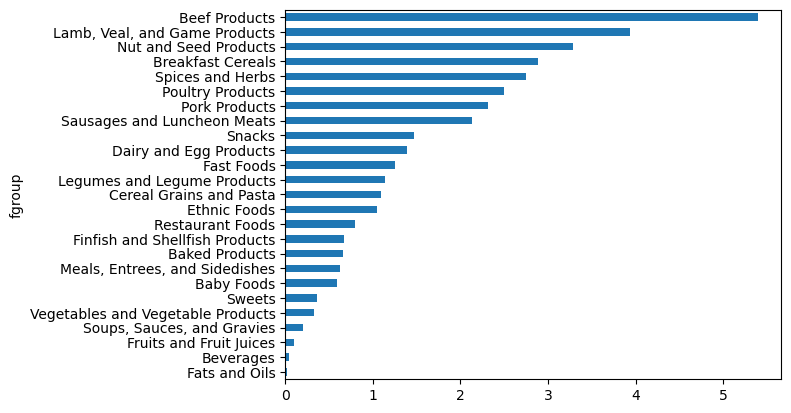

In [37]:
result["Zinc, Zn"].sort_values().plot(kind="barh")

In [38]:
ndata["nutrient"].unique()

array(['Protein', 'Total lipid (fat)', 'Carbohydrate, by difference',
       'Ash', 'Energy', 'Water', 'Fiber, total dietary', 'Calcium, Ca',
       'Iron, Fe', 'Magnesium, Mg', 'Phosphorus, P', 'Potassium, K',
       'Sodium, Na', 'Zinc, Zn', 'Copper, Cu', 'Manganese, Mn',
       'Selenium, Se', 'Vitamin A, IU', 'Retinol', 'Vitamin A, RAE',
       'Vitamin C, total ascorbic acid', 'Thiamin', 'Riboflavin',
       'Niacin', 'Pantothenic acid', 'Vitamin B-6', 'Folate, total',
       'Vitamin B-12', 'Folic acid', 'Folate, food', 'Folate, DFE',
       'Cholesterol', 'Fatty acids, total saturated',
       'Fatty acids, total monounsaturated',
       'Fatty acids, total polyunsaturated', 'Tryptophan', 'Threonine',
       'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Cystine',
       'Phenylalanine', 'Tyrosine', 'Valine', 'Arginine', 'Histidine',
       'Alanine', 'Aspartic acid', 'Glutamic acid', 'Glycine', 'Proline',
       'Serine', 'Sucrose', 'Lactose', 'Maltose', 'Alcohol, ethyl',
  

<Axes: ylabel='fgroup'>

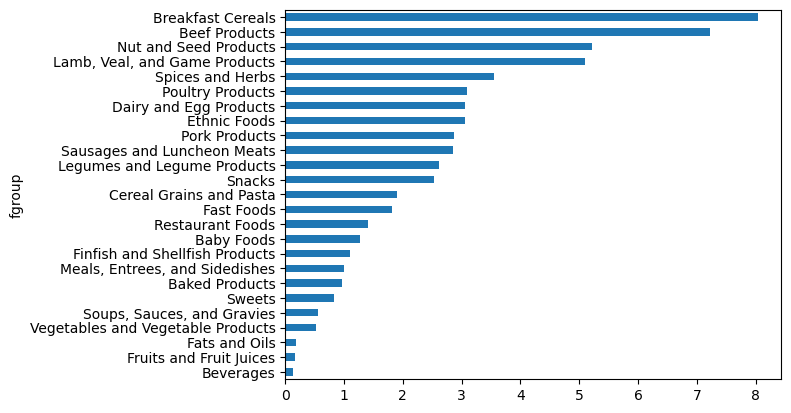

In [39]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.75)
result["Zinc, Zn"].sort_values().plot(kind="barh")

In [40]:
ndata.head()

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


In [41]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

In [42]:
ndata.groupby(["nutgroup", "nutrient"])["value"].sum()

nutgroup     nutrient                    
Amino Acids  Alanine                          3162.124
             Arginine                         3687.006
             Aspartic acid                    5259.967
             Cystine                           728.217
             Glutamic acid                    9867.106
                                               ...    
Vitamins     Vitamin D2 (ergocalciferol)        84.800
             Vitamin D3 (cholecalciferol)      949.800
             Vitamin E (alpha-tocopherol)     5346.050
             Vitamin E, added                 1027.270
             Vitamin K (phylloquinone)       58662.900
Name: value, Length: 94, dtype: float64

In [43]:
def get_max(x):
    return x.loc[x.value.idxmax()]

In [44]:
ndata.loc[ndata.value.idxmax()]

value                      100000.0
units                            IU
nutrient              Vitamin A, IU
nutgroup                   Vitamins
id                             4589
food            Fish oil, cod liver
fgroup                Fats and Oils
manufacturer                       
Name: 18475, dtype: object

In [45]:
max_foods = by_nutrient.apply(get_max)[["value", "food"]]

In [46]:
max_foods

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
            Cystine                          1.307   
            Glutamic acid                   17.452   
...                                            ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   
            Vitamin D3 (cholecalciferol)    27.400   
            Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                       food  
nutgroup    nutrient                                                                         
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened  
            Arginine                                           Seeds, sesame flour, low-fat  
            Aspartic acid                                               Soy protein isolate  
            Cystine                            Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                               Soy protein isolate  
...                                                                                     ...  
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
            Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

In [47]:
max_foods.loc["Amino Acids"]["food"]

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [48]:
ndata["nutgroup"].unique()

array(['Composition', 'Other', 'Energy', 'Elements', 'Vitamins',
       'Amino Acids', 'Sugars'], dtype=object)

In [49]:
ndata[ndata["nutgroup"] == "Amino Acids"]["value"].idxmax()

202230

In [50]:
ndata.tail(8)

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
375168,17.000,mcg,"Folate, food",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375169,17.000,mcg_DFE,"Folate, DFE",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375170,0.000,mg,"Vitamin E, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375175,0.041,g,"Fatty acids, total polyunsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


In [51]:
# work on nutrient group, nutrient and food and foodgroup.
# result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.75)
# result["Zinc, Zn"].sort_values().plot(kind="barh")

In [52]:
ndata["nutrient"].unique()

array(['Protein', 'Total lipid (fat)', 'Carbohydrate, by difference',
       'Ash', 'Energy', 'Water', 'Fiber, total dietary', 'Calcium, Ca',
       'Iron, Fe', 'Magnesium, Mg', 'Phosphorus, P', 'Potassium, K',
       'Sodium, Na', 'Zinc, Zn', 'Copper, Cu', 'Manganese, Mn',
       'Selenium, Se', 'Vitamin A, IU', 'Retinol', 'Vitamin A, RAE',
       'Vitamin C, total ascorbic acid', 'Thiamin', 'Riboflavin',
       'Niacin', 'Pantothenic acid', 'Vitamin B-6', 'Folate, total',
       'Vitamin B-12', 'Folic acid', 'Folate, food', 'Folate, DFE',
       'Cholesterol', 'Fatty acids, total saturated',
       'Fatty acids, total monounsaturated',
       'Fatty acids, total polyunsaturated', 'Tryptophan', 'Threonine',
       'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Cystine',
       'Phenylalanine', 'Tyrosine', 'Valine', 'Arginine', 'Histidine',
       'Alanine', 'Aspartic acid', 'Glutamic acid', 'Glycine', 'Proline',
       'Serine', 'Sucrose', 'Lactose', 'Maltose', 'Alcohol, ethyl',
  

In [53]:
table = ndata.pivot_table("value", index="food", columns=["nutrient"])

In [54]:
subtable = table.reindex(columns=["Protein", "Total lipid (fat)", "Water"], level="nutrient")

In [55]:
subtable.head()

nutrient,Protein,Total lipid (fat),Water
food,,,
AMARANTH FLAKES,15.54,7.00,3.00
"APPLEBEE'S, 9 oz house sirloin steak",25.63,8.19,64.11
"APPLEBEE'S, Double Crunch Shrimp",14.18,19.00,40.46
"APPLEBEE'S, French fries",3.39,13.37,43.28
"APPLEBEE'S, KRAFT, Macaroni & Cheese, from kid's menu",7.04,6.32,65.09


In [56]:
subtable.index = subtable.index.str[:30]

In [57]:
subtable.index[:3]

Index(['AMARANTH FLAKES', 'APPLEBEE'S, 9 oz house sirloin',
       'APPLEBEE'S, Double Crunch Shri'],
      dtype='object', name='food')

In [58]:
subtable.head()

nutrient,Protein,Total lipid (fat),Water
food,,,
AMARANTH FLAKES,15.54,7.00,3.00
"APPLEBEE'S, 9 oz house sirloin",25.63,8.19,64.11
"APPLEBEE'S, Double Crunch Shri",14.18,19.00,40.46
"APPLEBEE'S, French fries",3.39,13.37,43.28
"APPLEBEE'S, KRAFT, Macaroni &",7.04,6.32,65.09


In [59]:
subtable = subtable / subtable.sum()

In [60]:
subtable.head()

nutrient,Protein,Total lipid (fat),Water
food,,,
AMARANTH FLAKES,0.000212,0.000115,0.000008
"APPLEBEE'S, 9 oz house sirloin",0.000349,0.000134,0.000177
"APPLEBEE'S, Double Crunch Shri",0.000193,0.000311,0.000112
"APPLEBEE'S, French fries",0.000046,0.000219,0.000120
"APPLEBEE'S, KRAFT, Macaroni &",0.000096,0.000104,0.000180


In [61]:
subtable.loc["AMARANTH FLAKES"]

nutrient
Protein              0.000212
Total lipid (fat)    0.000115
Water                0.000008
Name: AMARANTH FLAKES, dtype: float64

In [78]:
subtable.index

Index(['AMARANTH FLAKES', 'APPLEBEE'S, 9 oz house sirloin',
       'APPLEBEE'S, Double Crunch Shri', 'APPLEBEE'S, French fries',
       'APPLEBEE'S, KRAFT, Macaroni & ', 'APPLEBEE'S, chicken fingers, f',
       'APPLEBEE'S, mozzarella sticks', 'ARCHWAY Home Style Cookies, Ap',
       'ARCHWAY Home Style Cookies, Ap', 'ARCHWAY Home Style Cookies, Ch',
       ...
       'Yellow pond lily, Wocas, dried', 'Yellow pond lily, Wocas, tuber',
       'Yogurt parfait, lowfat, with f', 'Yogurt, chocolate, nonfat milk',
       'Yogurt, fruit variety, nonfat', 'Yogurt, fruit variety, nonfat,',
       'Yogurt, fruit, lowfat, with lo', 'Yogurt, plain, skim milk, 13 g',
       'Yogurt, vanilla or lemon flavo', 'Yogurt, vanilla, low fat, 11 g'],
      dtype='object', name='food', length=6636)

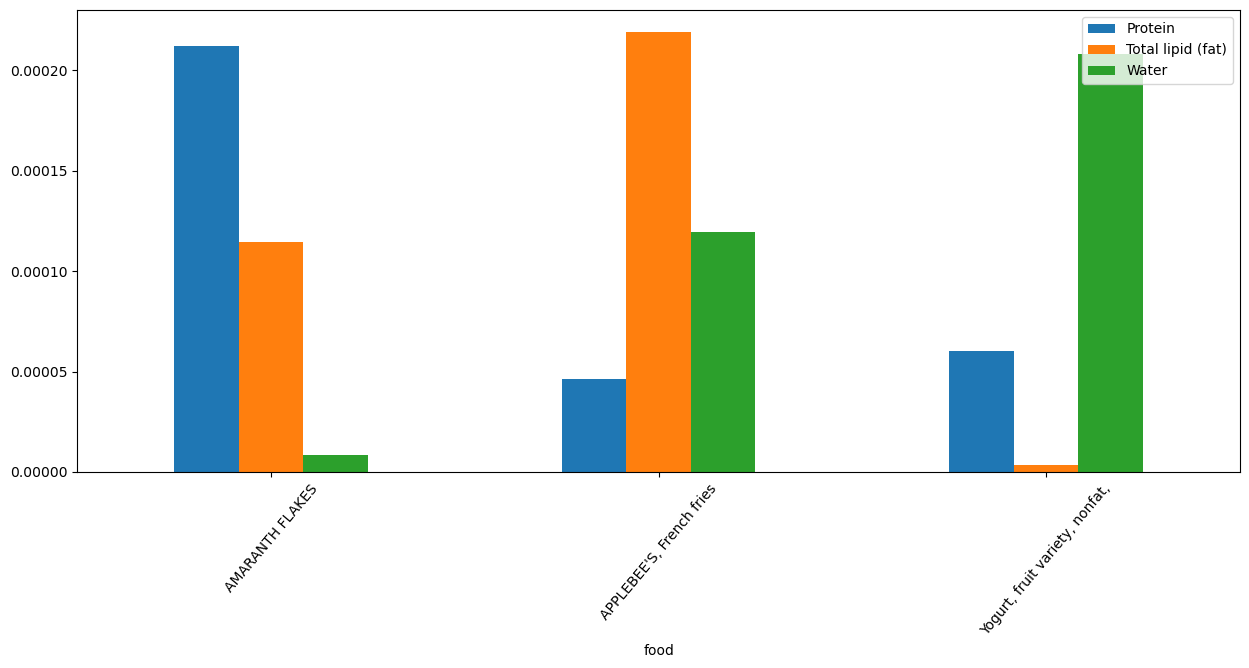

In [106]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
# ax = fig.add_subplot()
subtable.loc[["AMARANTH FLAKES", "APPLEBEE'S, French fries", "Yogurt, fruit variety, nonfat,"]].plot(kind="bar", ax=ax)
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
# plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

In [115]:
import matplotlib.pyplot as plt

def plot(data: pd.DataFrame, nutrient1: str,
         nutrient2: str, nutrient3: str,
         food1: str, food2: str, food3: str):
        
        """Plots food vs nutirents"""
        # make the pivot table for analysis food vs nutrient.
        subtable = data.pivot_table("value", index="food", columns=["nutrient"])
        subtable = subtable.reindex(columns=[nutrient1, nutrient2, nutrient3], level="nutrient")
        subtable = subtable / subtable.sum()

        # plotting.
        fig, ax = plt.subplots(figsize=(15, 8))
        subtable.loc[[food1, food2, food3]].plot(kind="bar", ax=ax)
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

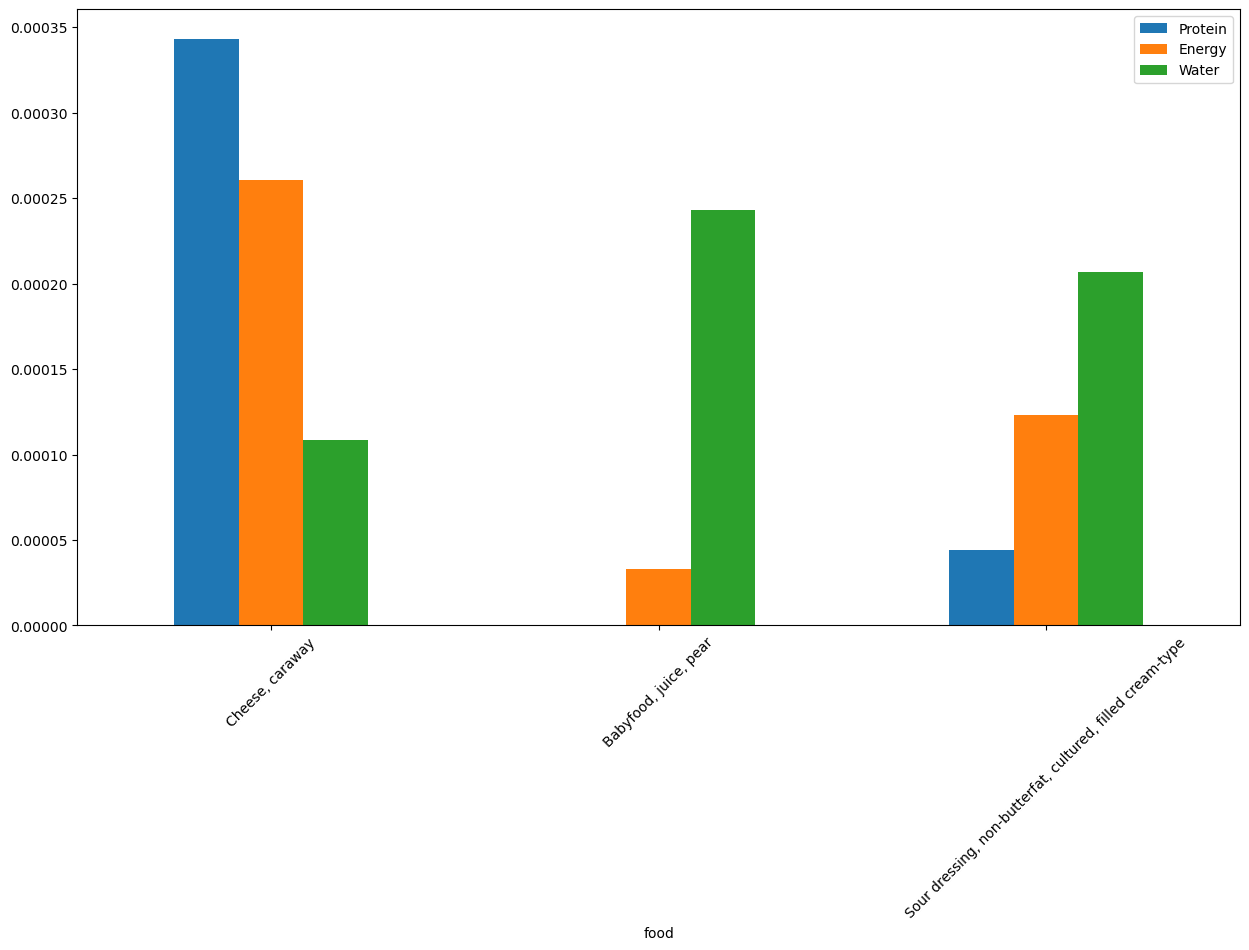

In [116]:
plot(ndata, "Protein", "Energy", "Water", 
     "Cheese, caraway", "Babyfood, juice, pear", 
     "Sour dressing, non-butterfat, cultured, filled cream-type")

In [119]:
import pandas as pd
import plotly.express as px

def plot(data: pd.DataFrame, nutrient1: str,
         nutrient2: str, nutrient3: str,
         food1: str, food2: str, food3: str):
        
        """Plots food vs nutrients"""
        # make the pivot table for analysis food vs nutrient.
        subtable = data.pivot_table("value", index="food", columns=["nutrient"])
        subtable = subtable.reindex(columns=[nutrient1, nutrient2, nutrient3], level="nutrient")
        subtable = subtable / subtable.sum()

        # Create a Plotly bar plot
        fig = px.bar(subtable.loc[[food1, food2, food3]].reset_index(), 
                     x='food', y=[nutrient1, nutrient2, nutrient3], 
                     labels={'value': 'Normalized Value'}, 
                     title='Food vs Nutrients',
                     hover_name='food', hover_data={'value': True})
        
        # Set orientation to vertical
        fig.update_layout(barmode='group')  # Display bars in groups
        fig.update_xaxes(title_text="Food")  # X-axis label
        fig.update_yaxes(title_text="Normalized Value")  # Y-axis label
        
        # Show the plot
        fig.show()

plot(ndata, "Protein", "Energy", "Water", 
     "Cheese, caraway", "Babyfood, juice, pear", 
     "Sour dressing, non-butterfat, cultured, filled cream-type")
